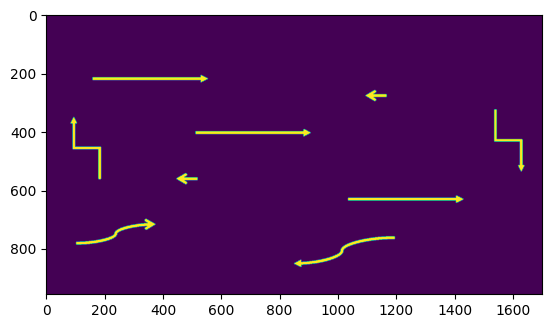

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_only_arrows(threshold_image):
    background_image = np.zeros_like(threshold_image) #for getting the image without shapes
    #CHAIN_APPROX_SIMPLE -> to getting corners of the image
    #RETR_TREE -> retrieve all the contours
    #it is easier to find contours when it is a threshold image
    contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    #hierarchy will be never used in this context (layers of the image)
    for cnt in contours:
        hull = cv2.convexHull(cnt, returnPoints=False) #boundaries of shapes 
        defects = cv2.convexityDefects(cnt, hull) #holes between boundaries and shape
        if defects is not None:
            for i in range(defects.shape[0]):
                if defects[i, 0][3] > 500:
                    cv2.drawContours(background_image, [cnt], -1, (255,255,255), -1) #-1 is for drawing all contours
    return background_image

image = cv2.imread("arrows.png")
arrow_image = get_only_arrows(cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_BINARY_INV)[1])
plt.imshow(arrow_image)